In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
Adults=pd.read_csv("/content/adult_with_headers.csv")

In [3]:
Adults.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
Adults['capital_gain'].unique()

array([ 2174,     0, 14084,  5178,  5013,  2407, 14344, 15024,  7688,
       34095,  4064,  4386,  7298,  1409,  3674,  1055,  3464,  2050,
        2176,   594, 20051,  6849,  4101,  1111,  8614,  3411,  2597,
       25236,  4650,  9386,  2463,  3103, 10605,  2964,  3325,  2580,
        3471,  4865, 99999,  6514,  1471,  2329,  2105,  2885, 25124,
       10520,  2202,  2961, 27828,  6767,  2228,  1506, 13550,  2635,
        5556,  4787,  3781,  3137,  3818,  3942,   914,   401,  2829,
        2977,  4934,  2062,  2354,  5455, 15020,  1424,  3273, 22040,
        4416,  3908, 10566,   991,  4931,  1086,  7430,  6497,   114,
        7896,  2346,  3418,  3432,  2907,  1151,  2414,  2290, 15831,
       41310,  4508,  2538,  3456,  6418,  1848,  3887,  5721,  9562,
        1455,  2036,  1831, 11678,  2936,  2993,  7443,  6360,  1797,
        1173,  4687,  6723,  2009,  6097,  2653,  1639, 18481,  7978,
        2387,  5060])

In [5]:
Adults.shape

(32561, 15)

In [6]:
Adults.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
Adults.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
32556    False
32557    False
32558    False
32559    False
32560    False
Length: 32561, dtype: bool

In [8]:
Adults.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
Adults.tail()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [10]:
Adults.drop(['relationship','race'],axis=1,inplace=True)

In [11]:
Adults

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Male,0,0,20,United-States,<=50K


In [12]:
Adults['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [13]:
Adults['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [14]:
Adults['education_num'].unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8])

In [15]:
Adults['age'].unique()

array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87])

In [16]:
Adults['hours_per_week'].unique()

array([40, 13, 16, 45, 50, 80, 30, 35, 60, 20, 52, 44, 15, 25, 38, 43, 55,
       48, 58, 32, 70,  2, 22, 56, 41, 28, 36, 24, 46, 42, 12, 65,  1, 10,
       34, 75, 98, 33, 54,  8,  6, 64, 19, 18, 72,  5,  9, 47, 37, 21, 26,
       14,  4, 59,  7, 99, 53, 39, 62, 57, 78, 90, 66, 11, 49, 84,  3, 17,
       68, 27, 85, 31, 51, 77, 63, 23, 87, 88, 73, 89, 97, 94, 29, 96, 67,
       82, 86, 91, 81, 76, 92, 61, 74, 95])

In [17]:
Adults['fnlwgt'].unique()

array([ 77516,  83311, 215646, ...,  34066,  84661, 257302])

In [18]:
Adults['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [19]:
Adults1=Adults.copy()

In [20]:
le=LabelEncoder()
Adults1['workclass']=le.fit_transform(Adults1['workclass'])
Adults1['occupation']=le.fit_transform(Adults1['occupation'])
Adults1['native_country']=le.fit_transform(Adults1['native_country'])
Adults1['sex']=le.fit_transform(Adults1['sex'])
Adults1['income']=le.fit_transform(Adults1['income'])




In [21]:
Adults1.drop(['education'],axis=1,inplace=True)

In [22]:
Adults1

,age,workclass,fnlwgt,education_num,marital_status,occupation,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,7,77516,13,Never-married,1,1,2174,0,40,39,0
1,50,6,83311,13,Married-civ-spouse,4,1,0,0,13,39,0
2,38,4,215646,9,Divorced,6,1,0,0,40,39,0
3,53,4,234721,7,Married-civ-spouse,6,1,0,0,40,39,0
4,28,4,338409,13,Married-civ-spouse,10,0,0,0,40,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,12,Married-civ-spouse,13,0,0,0,38,39,0
32557,40,4,154374,9,Married-civ-spouse,7,1,0,0,40,39,1
32558,58,4,151910,9,Widowed,1,0,0,0,40,39,0
32559,22,4,201490,9,Never-married,1,1,0,0,20,39,0


In [23]:
Adults1['marital_status']=le.fit_transform(Adults1['marital_status'])

In [24]:
Adults2=Adults.copy()

ONE HOT ENCODER

In [25]:
Adults2['income'] = Adults2['income'].astype(str)
Adults2['workclass'] = Adults2['workclass'].astype(str)
Adults2['occupation'] = Adults2['occupation'].astype(str)
Adults2['native_country'] = Adults2['native_country'].astype(str)
Adults2['marital_status'] = Adults2['marital_status'].astype(str)
Adults2['sex']=Adults2['sex'].astype(str)

In [26]:
from sklearn.preprocessing import OneHotEncoder
enc= OneHotEncoder()
Adults2['income']=pd.DataFrame(enc.fit_transform(Adults2['income'].values.reshape(-1,1)))
Adults2['workclass']=pd.DataFrame(enc.fit_transform(Adults2['workclass'].values.reshape(-1,1)))
Adults2['occupation']=pd.DataFrame(enc.fit_transform(Adults2['occupation'].values.reshape(-1,1)))
Adults2['native_country']=pd.DataFrame(enc.fit_transform(Adults2['native_country'].values.reshape(-1,1)))
Adults2['marital_status']=pd.DataFrame(enc.fit_transform(Adults2['marital_status'].values.reshape(-1,1)))
Adults2['sex']=pd.DataFrame(enc.fit_transform(Adults2['sex'].values.reshape(-1,1)))


In [27]:
Adults2

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,"(0, 7)\t1.0",77516,Bachelors,13,"(0, 4)\t1.0","(0, 1)\t1.0","(0, 1)\t1.0",2174,0,40,"(0, 39)\t1.0","(0, 0)\t1.0"
1,50,"(0, 6)\t1.0",83311,Bachelors,13,"(0, 2)\t1.0","(0, 4)\t1.0","(0, 1)\t1.0",0,0,13,"(0, 39)\t1.0","(0, 0)\t1.0"
2,38,"(0, 4)\t1.0",215646,HS-grad,9,"(0, 0)\t1.0","(0, 6)\t1.0","(0, 1)\t1.0",0,0,40,"(0, 39)\t1.0","(0, 0)\t1.0"
3,53,"(0, 4)\t1.0",234721,11th,7,"(0, 2)\t1.0","(0, 6)\t1.0","(0, 1)\t1.0",0,0,40,"(0, 39)\t1.0","(0, 0)\t1.0"
4,28,"(0, 4)\t1.0",338409,Bachelors,13,"(0, 2)\t1.0","(0, 10)\t1.0","(0, 0)\t1.0",0,0,40,"(0, 5)\t1.0","(0, 0)\t1.0"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,"(0, 4)\t1.0",257302,Assoc-acdm,12,"(0, 2)\t1.0","(0, 13)\t1.0","(0, 0)\t1.0",0,0,38,"(0, 39)\t1.0","(0, 0)\t1.0"
32557,40,"(0, 4)\t1.0",154374,HS-grad,9,"(0, 2)\t1.0","(0, 7)\t1.0","(0, 1)\t1.0",0,0,40,"(0, 39)\t1.0","(0, 1)\t1.0"
32558,58,"(0, 4)\t1.0",151910,HS-grad,9,"(0, 6)\t1.0","(0, 1)\t1.0","(0, 0)\t1.0",0,0,40,"(0, 39)\t1.0","(0, 0)\t1.0"
32559,22,"(0, 4)\t1.0",201490,HS-grad,9,"(0, 4)\t1.0","(0, 1)\t1.0","(0, 1)\t1.0",0,0,20,"(0, 39)\t1.0","(0, 0)\t1.0"


Adults1 encoded with labelencoder and Adults2 encoded with One Hot Encoder but one Hot encoder provide multiple columns for each variable, so label encoder is better since the data is huge

In [28]:
Adults.groupby(['capital_gain','income','occupation']).size()

capital_gain  income  occupation       
0              <=50K   ?                   1576
                       Adm-clerical        3128
                       Armed-Forces           8
                       Craft-repair        3035
                       Exec-managerial     1996
                                           ... 
99999          >50K    Prof-specialty        67
                       Protective-serv        1
                       Sales                 25
                       Tech-support           1
                       Transport-moving       1
Length: 718, dtype: int64

In [29]:
Adults.groupby(['capital_loss','income','occupation']).size()

capital_loss  income  occupation        
0              <=50K   ?                    1610
                       Adm-clerical         3167
                       Armed-Forces            8
                       Craft-repair         3053
                       Exec-managerial      2023
                                            ... 
3770           <=50K   Other-service           1
3900           <=50K   Machine-op-inspct       1
                       Prof-specialty          1
4356           <=50K   ?                       2
                       Exec-managerial         1
Length: 512, dtype: int64

<Axes: xlabel='occupation', ylabel='income'>

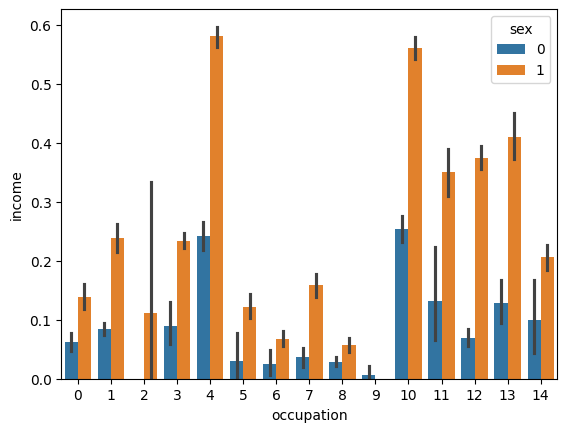

In [30]:
sns.barplot(x='occupation',y='income',hue='sex',data=Adults1)

<Axes: xlabel='capital_gain', ylabel='income'>

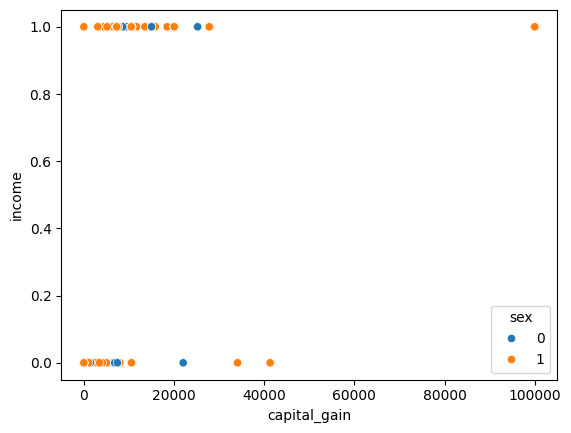

In [31]:
sns.scatterplot(x='capital_gain',y='income',hue='sex',data=Adults1)

<Axes: xlabel='capital_loss', ylabel='income'>

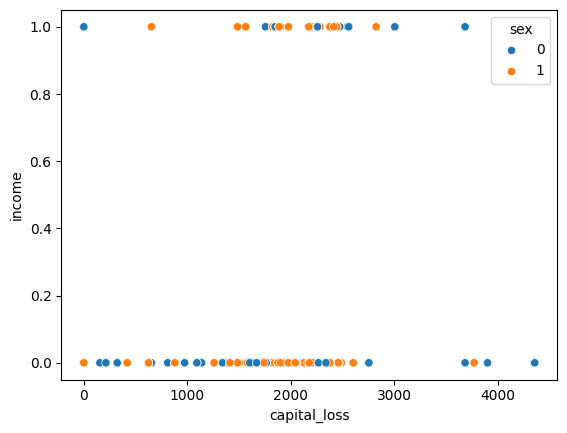

In [32]:
sns.scatterplot(x='capital_loss',y='income',hue='sex',data=Adults1)

<Axes: xlabel='fnlwgt', ylabel='income'>

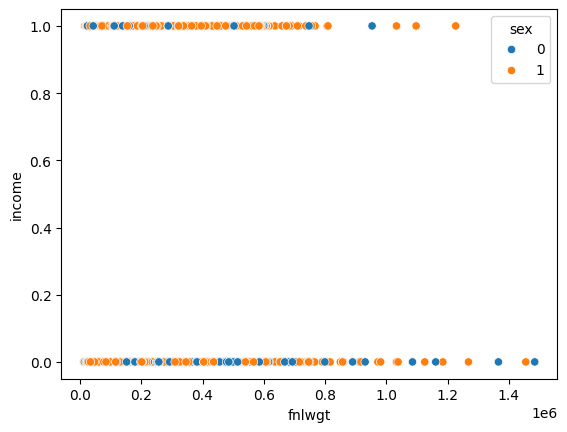

In [33]:
sns.scatterplot(x='fnlwgt',y='income',hue='sex',data=Adults1)

In [34]:
Adults1

,age,workclass,fnlwgt,education_num,marital_status,occupation,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,7,77516,13,4,1,1,2174,0,40,39,0
1,50,6,83311,13,2,4,1,0,0,13,39,0
2,38,4,215646,9,0,6,1,0,0,40,39,0
3,53,4,234721,7,2,6,1,0,0,40,39,0
4,28,4,338409,13,2,10,0,0,0,40,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,12,2,13,0,0,0,38,39,0
32557,40,4,154374,9,2,7,1,0,0,40,39,1
32558,58,4,151910,9,6,1,0,0,0,40,39,0
32559,22,4,201490,9,4,1,1,0,0,20,39,0


In [35]:
Adults1.drop(['marital_status'],axis=1,inplace=True)

In [36]:
Adults1.columns

Index(['age', 'workclass', 'fnlwgt', 'education_num', 'occupation', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

Feature Engineering

In [37]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [38]:
array=Adults1.values
x=array[:,0:11]
y=array[:,-1]
#feature extraction
test=SelectKBest(score_func=chi2,k=4)
fit=test.fit(x,y)
#summarize score
np.set_printoptions(precision=3)
print(fit.scores_)

[8.601e+03 4.751e+01 1.711e+05 2.401e+03 5.046e+02 5.024e+02 8.219e+07
 1.372e+06 6.476e+03 1.362e+01 2.472e+04]


In [39]:
Adults1.columns

Index(['age', 'workclass', 'fnlwgt', 'education_num', 'occupation', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

Recursive Feature Elimination

In [40]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegressionCV
array=Adults1.values
x=array[:,0:11]
y=array[:,-1]
#feature extraction
model=LogisticRegressionCV(max_iter=1000)
rfe=RFECV(estimator=model,step=1,cv=5,scoring='accuracy')
rfe.fit(x,y)
print(rfe.support_)
print(rfe.ranking_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[False False False False False False False False False False  True]
[ 4  6 11  3  7  2 10  9  5  8  1]


In [41]:
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False False False False  True]
[ 4  6 11  3  7  2 10  9  5  8  1]


In [42]:
Adults1.columns


Index(['age', 'workclass', 'fnlwgt', 'education_num', 'occupation', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [43]:
#Feature selection using Decision tree classifier

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
array=Adults1.values
x=array[:,0:11]
y=array[:,-11]
#feature Extraction
model=DecisionTreeClassifier()
model.fit(x,y)
print(model.feature_importances_)



[1.000e+00 0.000e+00 3.138e-05 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00]


In [46]:
Adults1.columns

Index(['age', 'workclass', 'fnlwgt', 'education_num', 'occupation', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [47]:
#According to above 3 feature engineering techniques we need to drop fnlwgt,education_num,capital_loss,capital_gain,native_country.
#we got the clear_output from Recursive Feature Elimination and SelectKBest techniques.

In [48]:
Adults1.drop(['fnlwgt','education_num','capital_gain','capital_loss','native_country'],axis=1,inplace=True)

In [49]:
Adults1

,age,workclass,occupation,sex,hours_per_week,income
0,39,7,1,1,40,0
1,50,6,4,1,13,0
2,38,4,6,1,40,0
3,53,4,6,1,40,0
4,28,4,10,0,40,0
...,...,...,...,...,...,...
32556,27,4,13,0,38,0
32557,40,4,7,1,40,1
32558,58,4,1,0,40,0
32559,22,4,1,1,20,0


<Axes: xlabel='workclass', ylabel='income'>

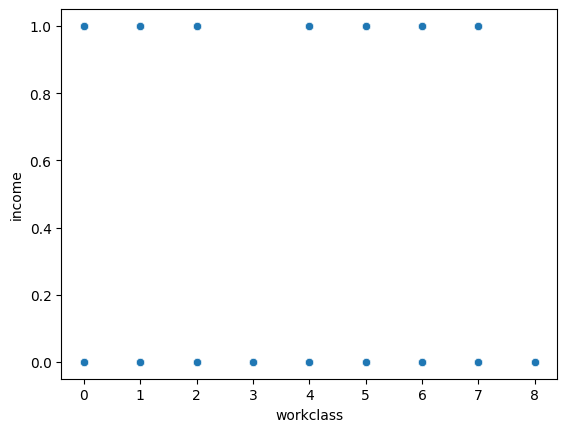

In [50]:
sns.scatterplot(x='workclass',y='income',data=Adults1)

In [51]:
Adults1.corr()

,age,workclass,occupation,sex,hours_per_week,income
age,1.000000,0.003787,-0.020947,0.088832,0.068756,0.234037
workclass,0.003787,1.000000,0.254892,0.095981,0.138962,0.051604
occupation,-0.020947,0.254892,1.000000,0.080296,0.080383,0.075468
sex,0.088832,0.095981,0.080296,1.000000,0.229309,0.215980
hours_per_week,0.068756,0.138962,0.080383,0.229309,1.000000,0.229689
income,0.234037,0.051604,0.075468,0.215980,0.229689,1.000000


here we can find occupation and income having less correlation and between occupation and age also less correlation

In [52]:
Adults1.corr()['income']

age               0.234037
workclass         0.051604
occupation        0.075468
sex               0.215980
hours_per_week    0.229689
income            1.000000
Name: income, dtype: float64

feature scaling

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
scaler=StandardScaler(copy=True,with_mean=True,with_std=True)

In [55]:
Adults1=scaler.fit_transform(Adults1)

In [56]:
Adults1

array([[ 0.031,  2.151, -1.318,  0.703, -0.035, -0.563],
       [ 0.837,  1.464, -0.608,  0.703, -2.222, -0.563],
       [-0.043,  0.09 , -0.135,  0.703, -0.035, -0.563],
       ...,
       [ 1.424,  0.09 , -1.318, -1.422, -0.035, -0.563],
       [-1.216,  0.09 , -1.318,  0.703, -1.655, -0.563],
       [ 0.984,  0.777, -0.608, -1.422, -0.035,  1.776]])

In [57]:
Adults3=pd.DataFrame(Adults1)

In [58]:
Adults3.columns=['age','workclass','occupation','sex','hours_per_week','income']

In [59]:
Adults3

,age,workclass,occupation,sex,hours_per_week,income
0,0.030671,2.150579,-1.317809,0.703071,-0.035429,-0.563199
1,0.837109,1.463736,-0.608387,0.703071,-2.222153,-0.563199
2,-0.042642,0.090050,-0.135438,0.703071,-0.035429,-0.563199
3,1.057047,0.090050,-0.135438,0.703071,-0.035429,-0.563199
4,-0.775768,0.090050,0.810458,-1.422331,-0.035429,-0.563199
...,...,...,...,...,...,...
32556,-0.849080,0.090050,1.519881,-1.422331,-0.197409,-0.563199
32557,0.103983,0.090050,0.101036,0.703071,-0.035429,1.775573
32558,1.423610,0.090050,-1.317809,-1.422331,-0.035429,-0.563199
32559,-1.215643,0.090050,-1.317809,0.703071,-1.655225,-0.563199


Isolation Forest

In [60]:
from sklearn.ensemble import IsolationForest

In [61]:
clf=IsolationForest(random_state=10,contamination=0.01)

In [62]:
clf.fit(Adults3)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.01, random_state=10)

In [63]:
y_pred_outliers=clf.predict(Adults3)

In [64]:
y_pred_outliers

array([1, 1, 1, ..., 1, 1, 1])

In [65]:
y_pred_outliers.shape

(32561,)

In [66]:
y_pred_outliers.sum()

31911

In [67]:
y_pred_outliers.mean()

0.980037468136728

In [68]:
y_pred_outliers.max()

1

In [69]:
y_pred_outliers.min()

-1

In [70]:
y_pred_outliers.std()

0.19881287948257248

In [71]:
Anamoly=pd.DataFrame(y_pred_outliers)

In [72]:
Anamoly

,0
0,1
1,1
2,1
3,1
4,1
...,...
32556,1
32557,1
32558,1
32559,1


In [73]:
Adults3.shape

(32561, 6)

In [74]:
clf.score_samples(Adults3)

array([-0.522, -0.557, -0.389, ..., -0.476, -0.484, -0.563])

In [75]:
Adults3

,age,workclass,occupation,sex,hours_per_week,income
0,0.030671,2.150579,-1.317809,0.703071,-0.035429,-0.563199
1,0.837109,1.463736,-0.608387,0.703071,-2.222153,-0.563199
2,-0.042642,0.090050,-0.135438,0.703071,-0.035429,-0.563199
3,1.057047,0.090050,-0.135438,0.703071,-0.035429,-0.563199
4,-0.775768,0.090050,0.810458,-1.422331,-0.035429,-0.563199
...,...,...,...,...,...,...
32556,-0.849080,0.090050,1.519881,-1.422331,-0.197409,-0.563199
32557,0.103983,0.090050,0.101036,0.703071,-0.035429,1.775573
32558,1.423610,0.090050,-1.317809,-1.422331,-0.035429,-0.563199
32559,-1.215643,0.090050,-1.317809,0.703071,-1.655225,-0.563199


PPS score

In [76]:
!pip install ppscore

In [77]:
import ppscore as pps

In [79]:
y=Adults3['income']

In [80]:
pps.matrix(Adults3)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,age,age,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,age,workclass,0.000000,regression,True,mean absolute error,0.510049,0.601455,DecisionTreeRegressor()
2,age,occupation,0.000000,regression,True,mean absolute error,0.887629,0.890108,DecisionTreeRegressor()
3,age,sex,0.000000,regression,True,mean absolute error,0.714135,0.937639,DecisionTreeRegressor()
4,age,hours_per_week,0.000000,regression,True,mean absolute error,0.620090,0.658374,DecisionTreeRegressor()
5,age,income,0.000000,regression,True,mean absolute error,0.566918,0.768000,DecisionTreeRegressor()
6,workclass,age,0.019258,regression,True,mean absolute error,0.821526,0.805705,DecisionTreeRegressor()
7,workclass,workclass,1.000000,predict_itself,True,None,0.000000,1.000000,None
8,workclass,occupation,0.106895,regression,True,mean absolute error,0.887629,0.792746,DecisionTreeRegressor()
9,workclass,sex,0.000000,regression,True,mean absolute error,0.714135,0.926923,DecisionTreeRegressor()
